In [ ]:
#Melakukan instalasi library dan import library
!pip install pystan~=2.14
!pip install fbprophet

In [52]:
from fbprophet import Prophet
import pandas as pd
from fbprophet.plot import plot_plotly
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from prophet.diagnostics import cross_validation, performance_metrics
figure(num=None, figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [38]:
#Melakukan import terhadap data yang digunakan
df_median_irregularities_bogor = pd.read_csv("aggregate_median_irregularities_Kota Bogor.csv", engine='python')

In [39]:
#Melihat informasi mengenai data
df_median_irregularities_bogor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4051 entries, 0 to 4050
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       4051 non-null   object 
 1   kemendagri_kabupaten_kode  4051 non-null   float64
 2   kemendagri_kabupaten_nama  4051 non-null   object 
 3   street                     4051 non-null   object 
 4   jam_level                  4051 non-null   int64  
 5   median_length              4051 non-null   float64
 6   median_delay_seconds       4051 non-null   float64
 7   median_regular_speed       4051 non-null   float64
 8   total_records              4051 non-null   int64  
 9   cause_type                 0 non-null      float64
 10  median_seconds             4051 non-null   float64
 11  median_speed               4051 non-null   float64
 12  date                       4051 non-null   object 
 13  median_jam_level           4051 non-null   float

In [40]:
#Mengubah tipe data dari time menjadi datetime
df_median_irregularities_bogor['time'] = pd.to_datetime(df_median_irregularities_bogor['time'])

In [41]:
#Melihat tipedata setelah diubah menjadi datetime
df_median_irregularities_bogor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4051 entries, 0 to 4050
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       4051 non-null   datetime64[ns]
 1   kemendagri_kabupaten_kode  4051 non-null   float64       
 2   kemendagri_kabupaten_nama  4051 non-null   object        
 3   street                     4051 non-null   object        
 4   jam_level                  4051 non-null   int64         
 5   median_length              4051 non-null   float64       
 6   median_delay_seconds       4051 non-null   float64       
 7   median_regular_speed       4051 non-null   float64       
 8   total_records              4051 non-null   int64         
 9   cause_type                 0 non-null      float64       
 10  median_seconds             4051 non-null   float64       
 11  median_speed               4051 non-null   float64       
 12  date  

In [42]:
#Mengambil data time dan jam_level karena dua kolom tersebut yang digunakan untuk melakukan forecasting
new_df = df_median_irregularities_bogor[['time', 'jam_level']]

In [43]:
# Dikarenakan penggunaan library prophet, maka kolom perlu di rename sesuai dengan ketentuan yaitu dengan nama ds dan y
new_df = new_df.rename(columns={'time': 'ds', 'jam_level': 'y'})

In [44]:
# Library Prophet merupakan sebuah library yang digunakan untuk melakukan forecasting, di tahap ini dilakukan fit terhadap model
m = Prophet()
m.fit(new_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [48]:
#Membuat future dataframe
future = m.make_future_dataframe(periods=30)
future.head()

,ds
0,2022-07-06 09:00:00
1,2022-07-06 10:00:00
2,2022-07-06 11:00:00
3,2022-07-06 12:00:00
4,2022-07-06 13:00:00


In [47]:
# Kolom yhat merupakan hasil dari prediksi dan forecasting yang dilakukan
forecast = m.predict(future)
forecast.head(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-06 09:00:00,3.361811,2.792136,4.308247,3.361811,3.361811,0.146060,0.146060,0.146060,0.140714,0.140714,0.140714,0.005346,0.005346,0.005346,0.0,0.0,0.0,3.507871
1,2022-07-06 10:00:00,3.361819,2.760208,4.256796,3.361819,3.361819,0.152661,0.152661,0.152661,0.145829,0.145829,0.145829,0.006832,0.006832,0.006832,0.0,0.0,0.0,3.514480
2,2022-07-06 11:00:00,3.361826,2.791976,4.310684,3.361826,3.361826,0.200671,0.200671,0.200671,0.192525,0.192525,0.192525,0.008146,0.008146,0.008146,0.0,0.0,0.0,3.562498
3,2022-07-06 12:00:00,3.361834,2.826680,4.320704,3.361834,3.361834,0.229944,0.229944,0.229944,0.220652,0.220652,0.220652,0.009292,0.009292,0.009292,0.0,0.0,0.0,3.591778
4,2022-07-06 13:00:00,3.361842,2.828712,4.348079,3.361842,3.361842,0.219104,0.219104,0.219104,0.208830,0.208830,0.208830,0.010274,0.010274,0.010274,0.0,0.0,0.0,3.580946
5,2022-07-06 14:00:00,3.361850,2.830018,4.361932,3.361850,3.361850,0.196567,0.196567,0.196567,0.185467,0.185467,0.185467,0.011100,0.011100,0.011100,0.0,0.0,0.0,3.558416
6,2022-07-06 15:00:00,3.361857,2.723356,4.292306,3.361857,3.361857,0.195490,0.195490,0.195490,0.183713,0.183713,0.183713,0.011777,0.011777,0.011777,0.0,0.0,0.0,3.557348
7,2022-07-06 16:00:00,3.361865,2.809947,4.343280,3.361865,3.361865,0.211186,0.211186,0.211186,0.198869,0.198869,0.198869,0.012317,0.012317,0.012317,0.0,0.0,0.0,3.573051
8,2022-07-06 17:00:00,3.361873,2.833014,4.350004,3.361873,3.361873,0.209749,0.209749,0.209749,0.197016,0.197016,0.197016,0.012733,0.012733,0.012733,0.0,0.0,0.0,3.571621
9,2022-07-06 18:00:00,3.361880,2.788884,4.313677,3.361880,3.361880,0.174420,0.174420,0.174420,0.161382,0.161382,0.161382,0.013037,0.013037,0.013037,0.0,0.0,0.0,3.536300


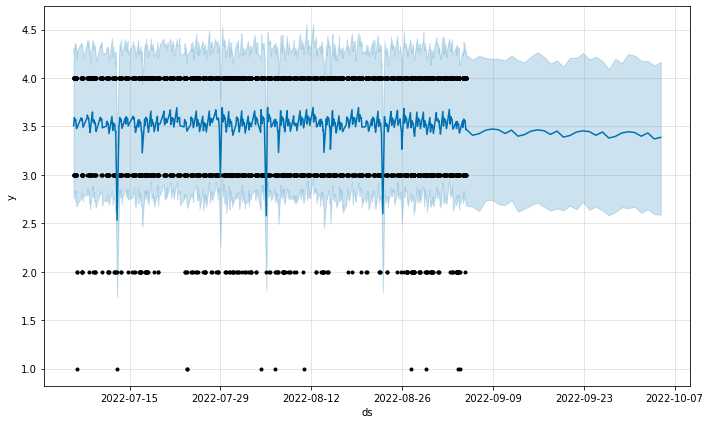

In [50]:
#Menampilkan model prediksi
fig1 = m.plot(forecast)

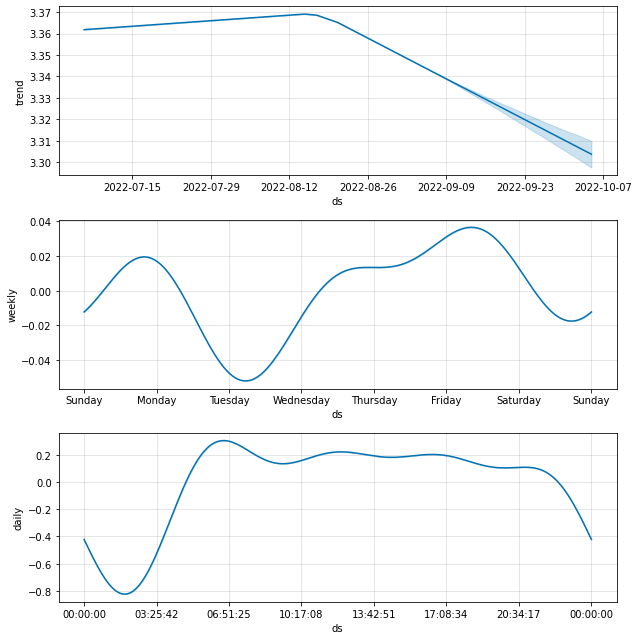

In [51]:
#Melihat informasi mengenai trend per hari, minggu, dan bulan
#Bisa dilihat bahwa saat diantara jumat ke sabtu merupakan tingkat kemacetan tertinggi
fig2 = m.plot_components(forecast)

In [59]:
#Melakukan evaluasi menggunakan hyperparameter tuning
baseline_model = cross_validation(model=m,initial='50 days', period='30 days', horizon = '10 days', parallel = 'processes')
baseline_model.head()

INFO:prophet:Making 1 forecasts with cutoffs between 2022-08-25 21:00:00 and 2022-08-25 21:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7faf07ab1790>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-25 22:00:00,3.437673,2.661686,4.187294,4,2022-08-25 21:00:00
1,2022-08-25 23:00:00,3.250331,2.531957,3.985847,4,2022-08-25 21:00:00
2,2022-08-25 23:00:00,3.250331,2.475026,3.999775,3,2022-08-25 21:00:00
3,2022-08-26 07:00:00,3.716633,2.938101,4.465177,3,2022-08-25 21:00:00
4,2022-08-26 07:00:00,3.716633,2.992585,4.466499,4,2022-08-25 21:00:00


In [60]:
#Melihat metric terhadap hyperparameter tuningnya
baseline_model_p = performance_metrics(baseline_model, rolling_window=1)
baseline_model_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,0.414324,0.64368,0.554026,0.1902,0.107158,0.165787,0.926337


In [61]:
#Mendapatkan hasil dari metric, dan tingkat error adalah 0.19
baseline_model_p['mape'].values[0]

0.19019962004261629